# ASSIGNMENT 2(PYTHON)
# Board Infinity
## Name: Raj Jadhav
## Batch: DS20AUG03

#### Context of Data:  
#### Company - UK-based and registered non-store online retail  
#### Products for selling - Mainly all-occasion gifts  
#### Customers - Most are wholesalers (local or international)  
#### Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year) 

In [176]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load The Data

In [177]:
df= pd.read_csv('F:\Board Infinity- Data Science\Python\Programme\Ecommerce  UK Retailer.csv',
                encoding='latin1')

In [178]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [180]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### There are negative values in Quantity and Unit Price Column

## Checking The Null Values

In [181]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Description and Customer Id are the key measures we cannot replace it with mean, mode or median so we drop the null record

## Drop The Null Values

In [182]:
df.dropna(subset=["Description"],inplace=True)
df.dropna(subset=["CustomerID"],inplace=True)

In [183]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Null Values Dropped

## Drop The Rows Containing Negative(-) Values

In [184]:
df.drop(df[df['Quantity']<0].index,inplace=True)

In [185]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### Record Containing Negative(-) Values Has Been Dropped.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


#### Data is clean now

## 1. Perform Basic EDA 
### a. Boxplot – All Numeric Variables 

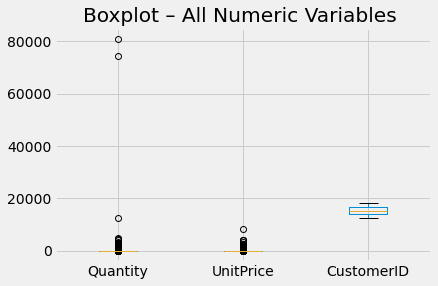

In [187]:
plt.style.use('fivethirtyeight')
df[['Quantity','UnitPrice','CustomerID']].plot.box()
plt.title('Boxplot – All Numeric Variables ');

### Removing Outliers

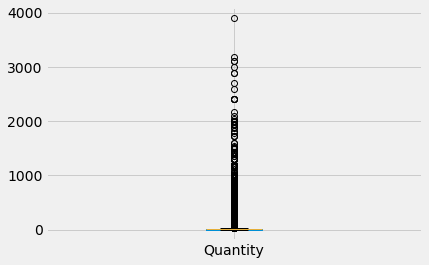

In [188]:
df.Quantity[df.Quantity<4000].plot.box();

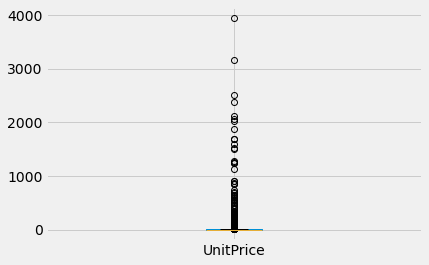

In [189]:
df.UnitPrice[df.UnitPrice<4000].plot.box();

### b. Histogram – All Numeric Variables 

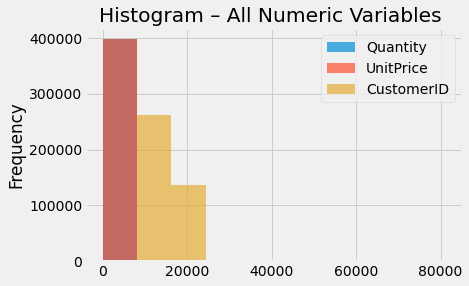

In [190]:
plt.style.use('fivethirtyeight')
df.plot.hist(alpha=0.7)
plt.title('Histogram – All Numeric Variables ');

### c. Distribution Plot – All Numeric Variables 

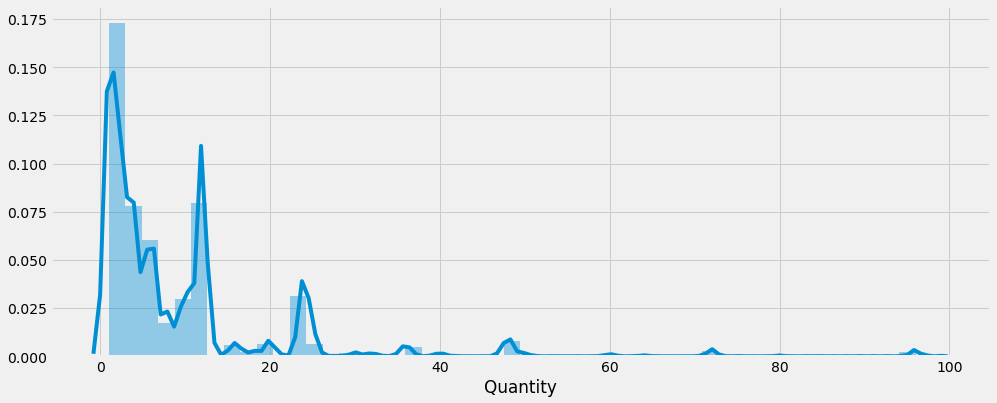

In [191]:
plt.figure(figsize=(15,6))
sns.distplot(df.Quantity[df.Quantity<100],bins=50);

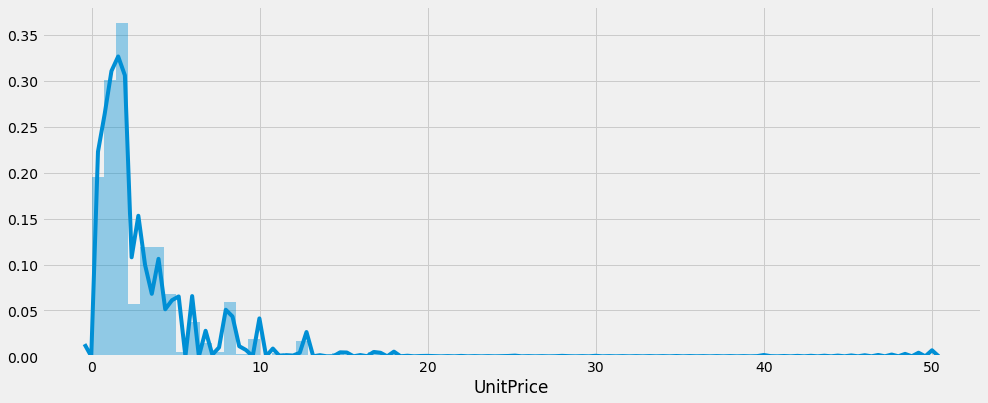

In [192]:
plt.figure(figsize=(15,6))
sns.distplot(df.UnitPrice[df.UnitPrice<50],bins=70);

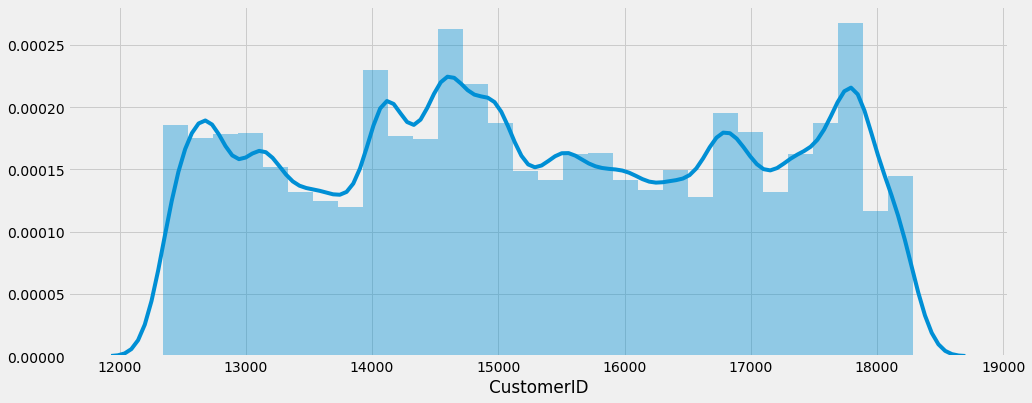

In [193]:
plt.figure(figsize=(15,6))
sns.distplot(df['CustomerID'],bins=30);

### d. Aggregation for all numerical Columns 

In [194]:
df['UnitPrice'].aggregate('sum')

1240000.614

In [195]:
df['CustomerID'].aggregate('sum')

6085975070.0

In [196]:
df['Quantity'].aggregate('sum')

5181696

### e. Unique Values across all columns 

In [197]:
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

### f. Duplicate values across all column

In [198]:
duplicated=df[df.duplicated()]

In [199]:
duplicated.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


In [200]:
duplicated.count()

InvoiceNo      5192
StockCode      5192
Description    5192
Quantity       5192
InvoiceDate    5192
UnitPrice      5192
CustomerID     5192
Country        5192
dtype: int64

### g. Correlation – Heatmap - All Numeric Variables 

In [201]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.004561,-0.006411
UnitPrice,-0.004561,1.000000,-0.010863
CustomerID,-0.006411,-0.010863,1.000000


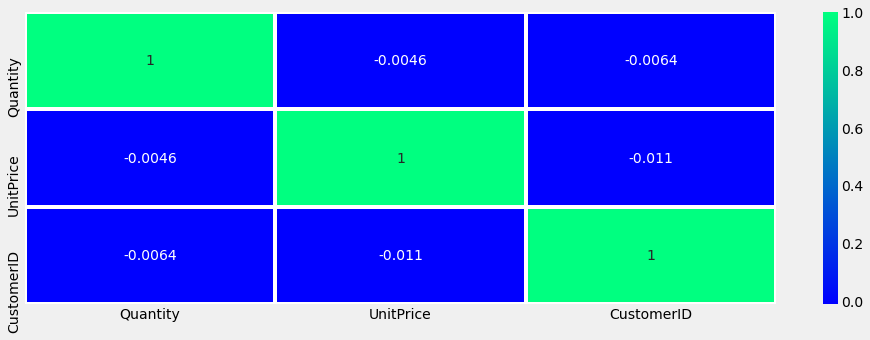

In [202]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidths=3,cmap='winter');

### h. Regression Plot - All Numeric Variables 

In [203]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


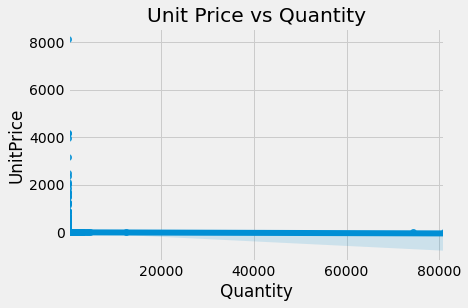

In [204]:
plt.style.use('fivethirtyeight')
sns.regplot(x='Quantity',y='UnitPrice',data=df)
plt.title('Unit Price vs Quantity');

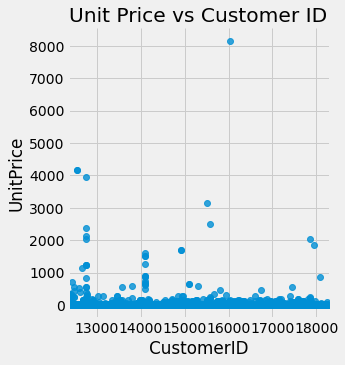

In [205]:
plt.style.use('fivethirtyeight')
sns.lmplot(x='CustomerID',y='UnitPrice',data=df)
plt.title('Unit Price vs Customer ID');

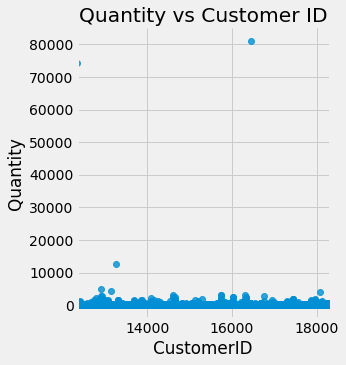

In [206]:
plt.style.use('fivethirtyeight')
sns.lmplot(x='CustomerID',y='Quantity',data=df)
plt.title('Quantity vs Customer ID');

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

In [207]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


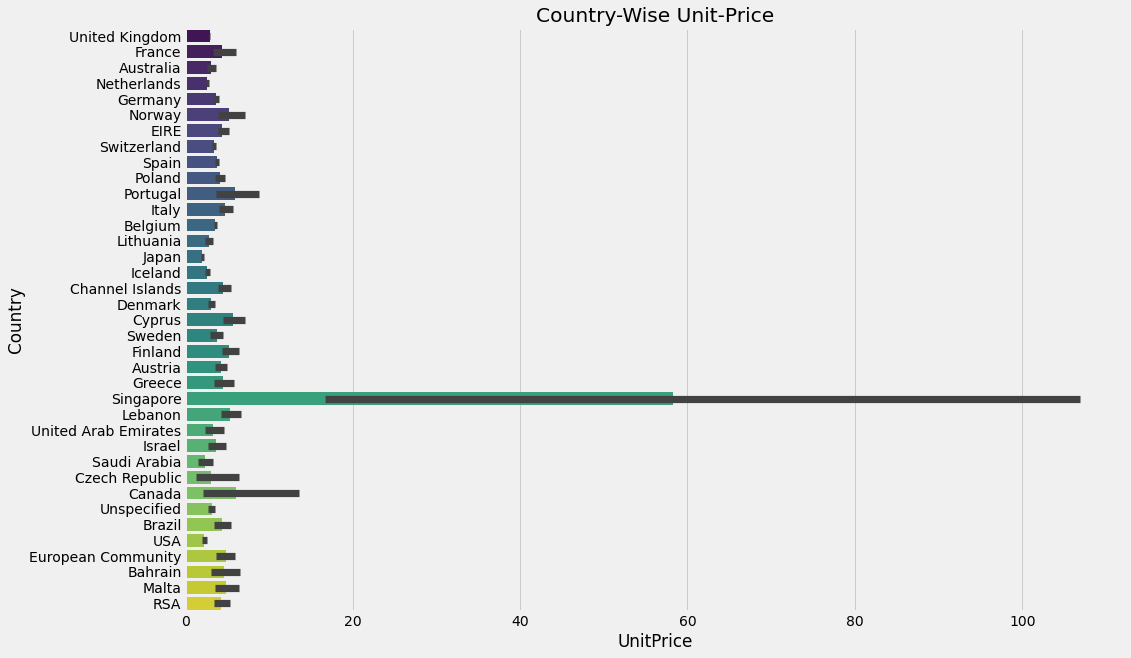

In [208]:
plt.figure(figsize=(15,10))
sns.barplot(x='UnitPrice',y='Country',data=df,palette='viridis')
plt.title('Country-Wise Unit-Price')
plt.show()

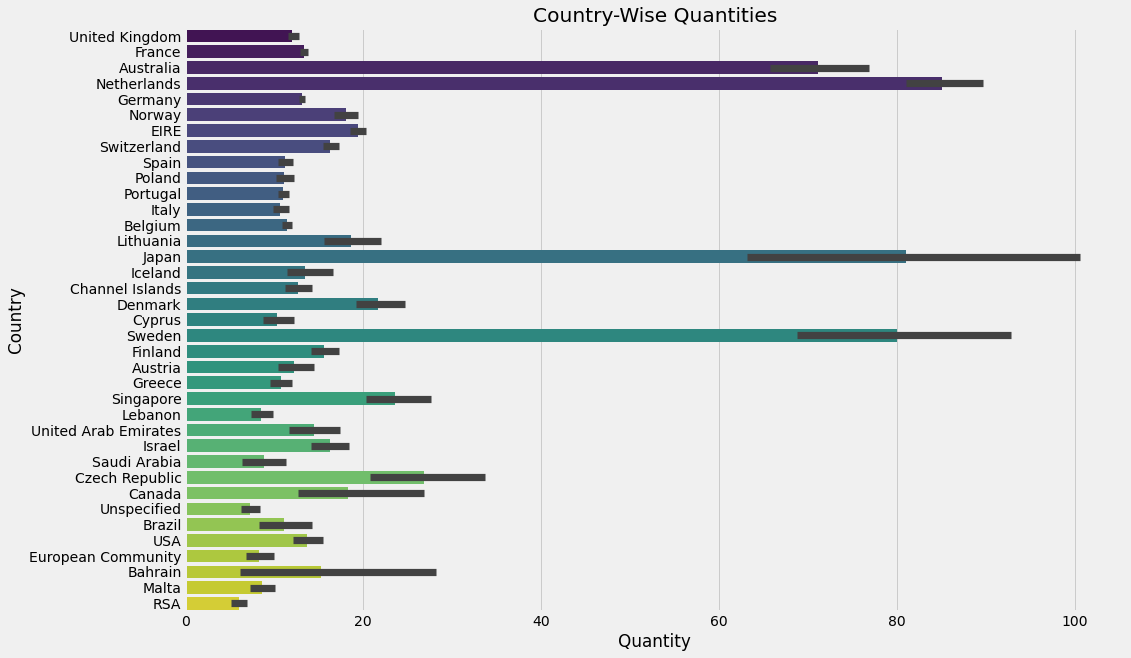

In [209]:
plt.figure(figsize=(15,10))
sns.barplot(x='Quantity',y='Country',data=df,palette='viridis')
plt.title('Country-Wise Quantities')
plt.show()

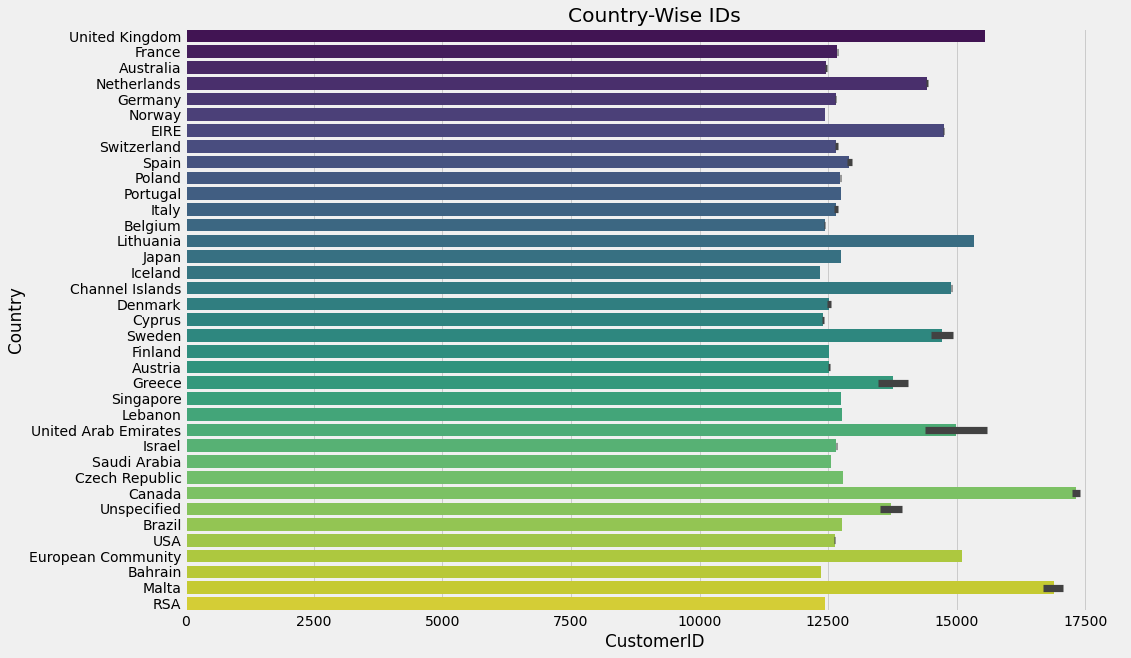

In [211]:
plt.figure(figsize=(15,10))
sns.barplot(x='CustomerID',y='Country',data=df,palette='viridis')
plt.title('Country-Wise IDs')
plt.show()

### j. Pair plot - All Numeric Variables 

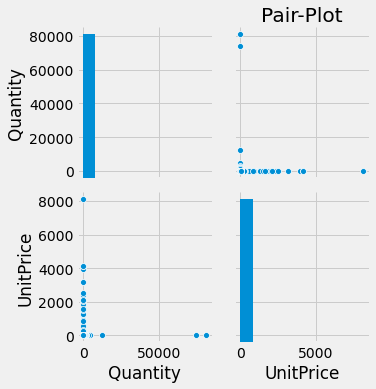

In [212]:
plt.style.use('fivethirtyeight')
sns.pairplot(df,vars=['Quantity','UnitPrice'])
plt.title('Pair-Plot');

### k. Line chart to show the trend of data - All Numeric/Date Variables 

In [213]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [214]:
df["Invoice_Year"]=df['InvoiceDate'].dt.year
df["Invoice_Month"]=df['InvoiceDate'].dt.month

In [215]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


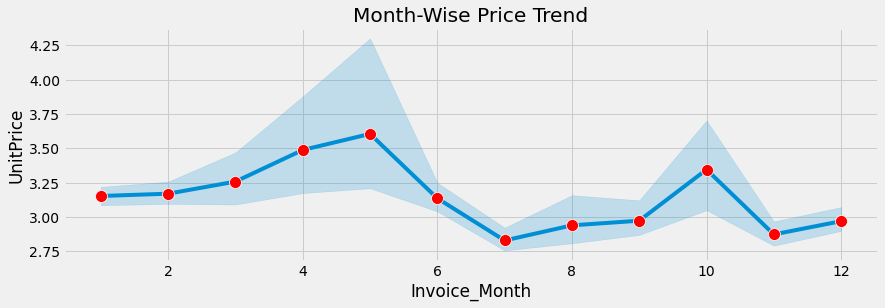

In [216]:
plt.figure(figsize=(13,4))
plt.style.use('fivethirtyeight')
sns.lineplot(y='UnitPrice',x='Invoice_Month',data=df,marker='o',markerfacecolor='r',markersize=12)
plt.title('Month-Wise Price Trend');


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397924 non-null  object        
 1   StockCode      397924 non-null  object        
 2   Description    397924 non-null  object        
 3   Quantity       397924 non-null  int64         
 4   InvoiceDate    397924 non-null  datetime64[ns]
 5   UnitPrice      397924 non-null  float64       
 6   CustomerID     397924 non-null  float64       
 7   Country        397924 non-null  object        
 8   Invoice_Year   397924 non-null  int64         
 9   Invoice_Month  397924 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 43.4+ MB


### l. Plot the skewness - All Numeric Variables 

Skewnes is 403.31943081039486


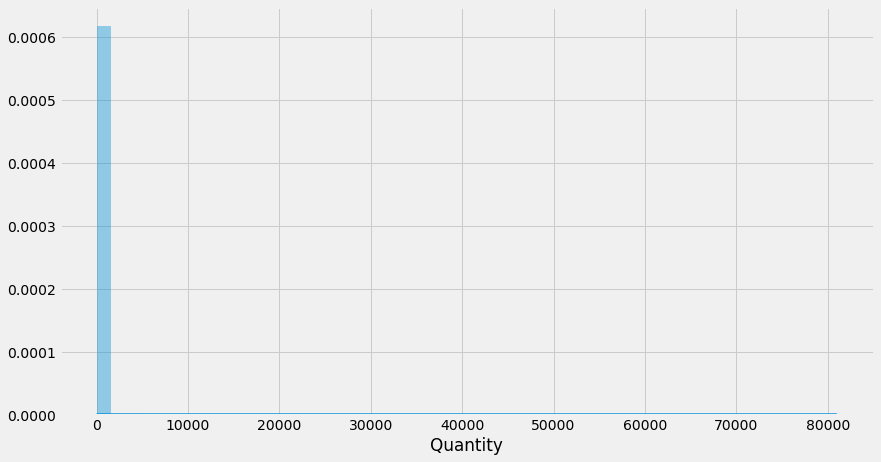

In [218]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
sns.distplot(df['Quantity'])
print("Skewnes is",(df['Quantity']).skew())

### Removing Outliers

Skewnes is 4.7940006490203295


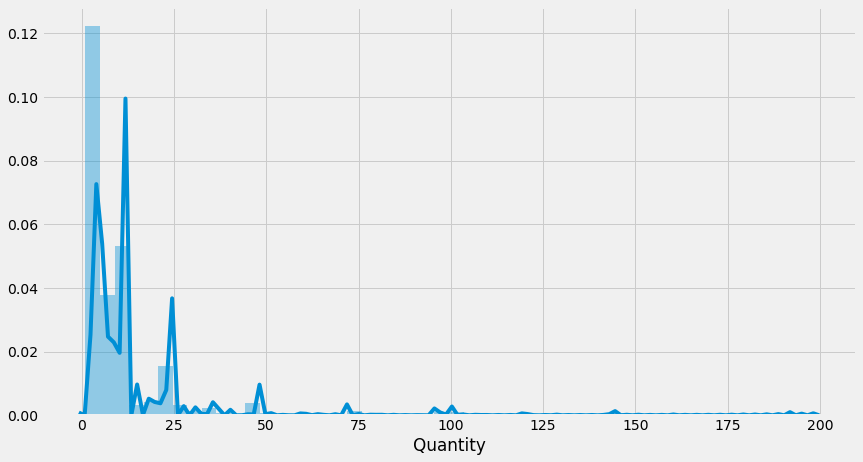

In [226]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
sns.distplot(df.Quantity[df.Quantity<200])
print("Skewnes is",(df.Quantity[df.Quantity<200]).skew())

Skewnes is 204.04241268899307


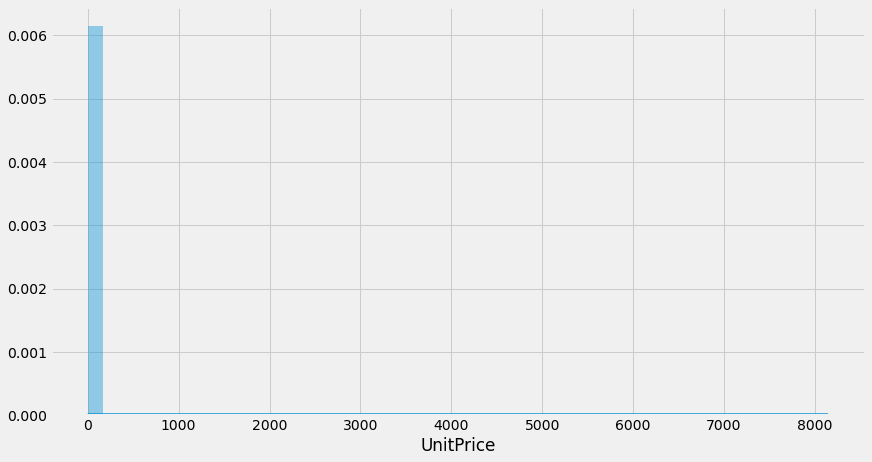

In [219]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
sns.distplot(df['UnitPrice'])
print("Skewnes is",(df['UnitPrice']).skew())

### Removing Outliers

Skewnes is 3.6404205132480327


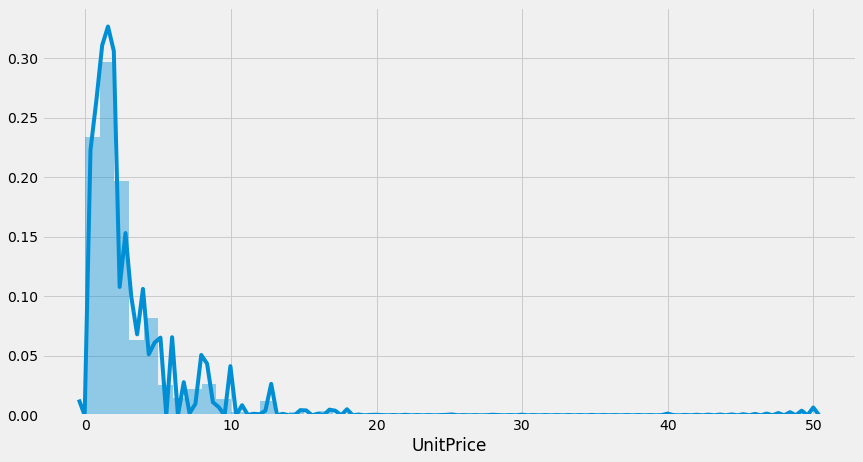

In [232]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
sns.distplot(df.UnitPrice[df.UnitPrice<50])
print("Skewnes is",(df.UnitPrice[df.UnitPrice<50]).skew())

Skewnes is 0.02577629847429845


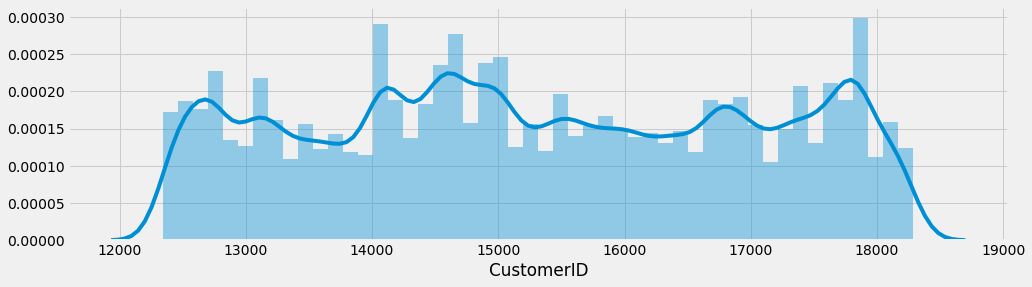

In [220]:
plt.figure(figsize=(15,4))
plt.style.use('fivethirtyeight')
sns.distplot(df['CustomerID'])
print("Skewnes is",(df['CustomerID']).skew())